In [2]:
!pip install tensorflow

     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/65.5 kB ? eta -:--:--
     ---------------------------------------- 65.5/65.5 kB ? eta 0:00:00
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     --------------------------- ------------ 1.0/1.5 MB 33.0 MB/s eta 0:00:01
     ---------------------------------------- 1.5/1.5 MB 23.8 MB/s eta 0:00:00
  Using cached wheel-0.42.0-py3-none-any.whl.metadata (2.2 kB)
   ---------------------------------------- 0.0/300.9 MB ? eta -:--:--
   ---------------------------------------- 1.5/300.9 MB 32.0 MB/s eta 0:00:10
   ---------------------------------------- 3.7/300.9 MB 33.8 MB/s eta 0:00:09
    --------------------------------------- 5.3/300.9 MB 37.7 MB/s eta 0:00:08
    --------------------------------------- 7.4/300.9 MB 36.3 MB/s eta 0:00:09
   - -------------------


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import tensorflow as tf

In [4]:
w = tf.Variable(2.)

def f(w):
  y = w**2
  z = 2*y + 5
  return z

In [5]:
with tf.GradientTape() as tape:
  z = f(w)

gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


In [6]:
# 학습될 가중치 변수를 선언
w = tf.Variable(4.0)
b = tf.Variable(1.0)

In [7]:
@tf.function
def hypothesis(x):
  return w*x + b

In [8]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [9]:
@tf.function
def mse_loss(y_pred, y):
  # 두 개의 차이값을 제곱을 해서 평균을 취한다.
  return tf.reduce_mean(tf.square(y_pred - y))

In [10]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

In [11]:
optimizer = tf.optimizers.SGD(0.01)

In [12]:
for i in range(301):
  with tf.GradientTape() as tape:
    # 현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
    y_pred = hypothesis(x)

    # 평균 제곱 오차를 계산
    cost = mse_loss(y_pred, y)

  # 손실 함수에 대한 파라미터의 미분값 계산
  gradients = tape.gradient(cost, [w, b])

  # 파라미터 업데이트
  optimizer.apply_gradients(zip(gradients, [w, b]))

  if i % 10 == 0:
    print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, w.numpy(), b.numpy(), cost))

epoch :   0 | w의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | w의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | w의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328165
epoch :  30 | w의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306967
epoch :  40 | w의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | w의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | w의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252898
epoch :  70 | w의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | w의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223598
epoch :  90 | w의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | w의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | w의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | w의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | w의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | w의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | w의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

In [13]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


In [ ]:
# # 예시 코드. 실행 불가.
# model = Sequential()
# model.add(keras.layers.Dense(1, input_dim=1))

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

# 출력 y의 차원은 1. 입력 x의 차원(input_dim)은 1
# 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = optimizers.SGD(lr=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# 주어진 x와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(x, y, epochs=300)

Epoch 1/300



1/1 [==============================] - 0s 365ms/step - loss: 4524.2358 - mse: 4524.2358
Epoch 2/300
1/1 [==============================] - 0s 0s/step - loss: 557.8034 - mse: 557.8034
Epoch 3/300
1/1 [==============================] - 0s 18ms/step - loss: 69.7619 - mse: 69.7619
Epoch 4/300
1/1 [==============================] - 0s 0s/step - loss: 9.7104 - mse: 9.7104
Epoch 5/300
1/1 [==============================] - 0s 4ms/step - loss: 2.3200 - mse: 2.3200
Epoch 6/300
1/1 [==============================] - 0s 13ms/step - loss: 1.4090 - mse: 1.4090
Epoch 7/300
1/1 [==============================] - 0s 2ms/step - loss: 1.2953 - mse: 1.2953
Epoch 8/300
1/1 [==============================] - 0s 0s/step - loss: 1.2798 - mse: 1.2798
Epoch 9/300
1/1 [==============================] - 0s 1ms/step - loss: 1.2763 - mse: 1.2763
Epoch 10/300
1/1 [==============================] - 0s 14ms/step - loss: 1.2743 - mse: 1.2743
Epoch 11/300
1/1 [==============================] - 0s 2ms/step - loss: 1.272

1/1 [==============================] - 0s 80ms/step


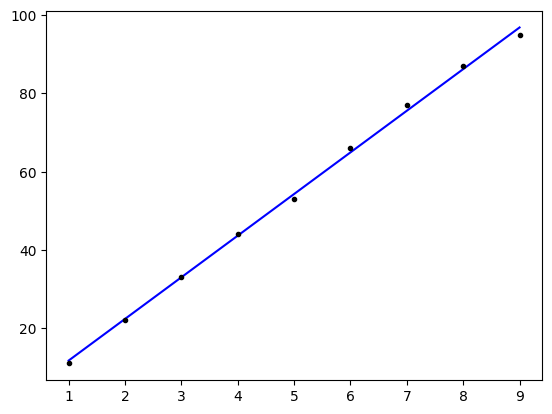

In [16]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')

In [19]:
print(model.predict([9.5]))

1/1 [==============================] - 0s 24ms/step
[[102.14193]]


In [20]:
import numpy as np
import matplotlib.pyplot as plt

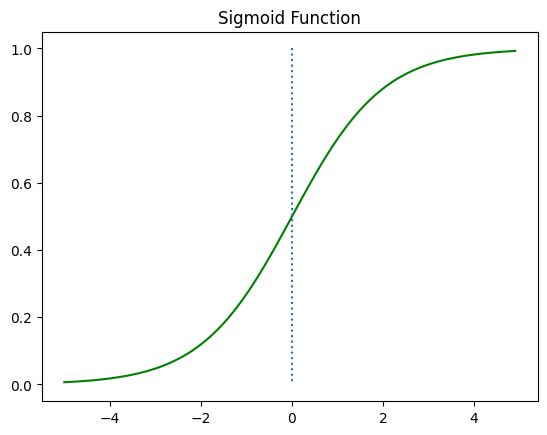

In [21]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

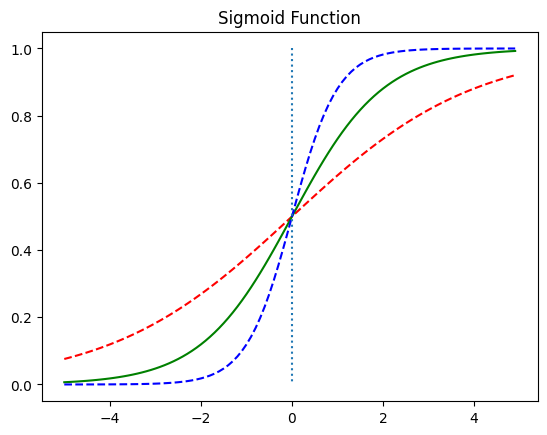

In [22]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # w의 값이 0.5일때
plt.plot(x, y2, 'g') # w의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # w의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

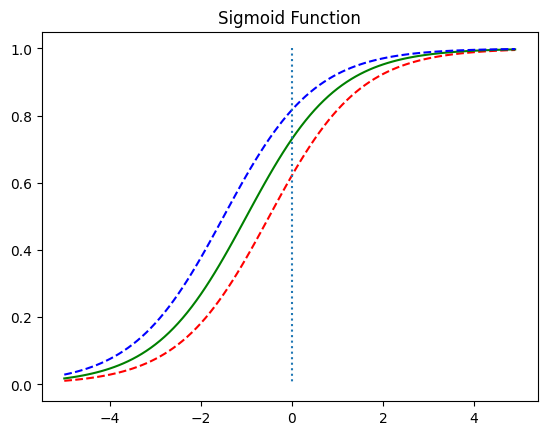

In [23]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) # 숫자 10부터 1

model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))

sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])

model.fit(x, y, epochs=200)

Epoch 1/200
1/1 [==============================] - 0s 331ms/step - loss: 3.8634 - binary_accuracy: 0.1538
Epoch 2/200
1/1 [==============================] - 0s 0s/step - loss: 0.2907 - binary_accuracy: 0.9231
Epoch 3/200
1/1 [==============================] - 0s 0s/step - loss: 0.2540 - binary_accuracy: 0.9231
Epoch 4/200
1/1 [==============================] - 0s 7ms/step - loss: 0.2392 - binary_accuracy: 0.9231
Epoch 5/200
1/1 [==============================] - 0s 0s/step - loss: 0.2304 - binary_accuracy: 0.9231
Epoch 6/200
1/1 [==============================] - 0s 15ms/step - loss: 0.2246 - binary_accuracy: 0.9231
Epoch 7/200
1/1 [==============================] - 0s 5ms/step - loss: 0.2203 - binary_accuracy: 0.9231
Epoch 8/200
1/1 [==============================] - 0s 6ms/step - loss: 0.2170 - binary_accuracy: 0.9231
Epoch 9/200
1/1 [==============================] - 0s 0s/step - loss: 0.2144 - binary_accuracy: 0.9231
Epoch 10/200
1/1 [==============================] - 0s 10ms/step 

1/1 [==============================] - 0s 48ms/step


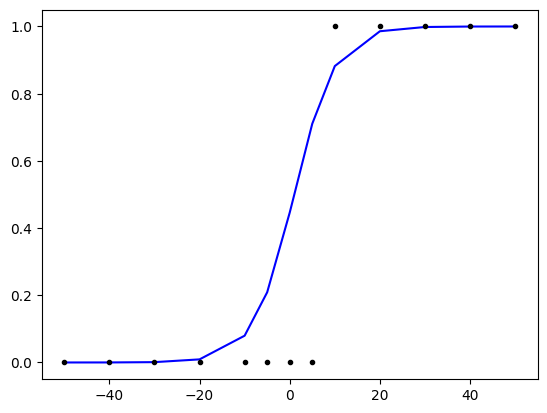

In [25]:
plt.plot(x, model.predict(x), 'b', x,y, 'k.')

In [26]:
print(model.predict([1, 2, 3, 4, 4.5]))
print(model.predict([11, 21, 31, 41, 500]))

1/1 [==============================] - 0s 64ms/step
[[0.5015905 ]
 [0.5570824 ]
 [0.6111852 ]
 [0.6626808 ]
 [0.68713254]]
1/1 [==============================] - 0s 33ms/step
[[0.9034391 ]
 [0.9886341 ]
 [0.99876493]
 [0.999867  ]
 [1.        ]]


In [27]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [28]:
# 중간 고사, 기말 고사, 가산점 점수
X = np.array([[70,85,11], [71,89,18], [50,80,20], [99,20,10], [50,10,10]]) 
y = np.array([73, 82 ,72, 57, 34]) # 최종 성적

model = Sequential()
model.add(Dense(1, input_dim=3, activation='linear'))

sgd = optimizers.SGD(learning_rate=0.0001)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(X, y, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 267ms/step - loss: 1670.4701 - mse: 1670.4701
Epoch 2/2000
1/1 [==============================] - 0s 0s/step - loss: 1004.7412 - mse: 1004.7412
Epoch 3/2000
1/1 [==============================] - 0s 0s/step - loss: 615.0521 - mse: 615.0521
Epoch 4/2000
1/1 [==============================] - 0s 16ms/step - loss: 383.8148 - mse: 383.8148
Epoch 5/2000
1/1 [==============================] - 0s 0s/step - loss: 244.7174 - mse: 244.7174
Epoch 6/2000
1/1 [==============================] - 0s 0s/step - loss: 159.9241 - mse: 159.9241
Epoch 7/2000
1/1 [==============================] - 0s 3ms/step - loss: 107.5728 - mse: 107.5728
Epoch 8/2000
1/1 [==============================] - 0s 0s/step - loss: 74.8636 - mse: 74.8636
Epoch 9/2000
1/1 [==============================] - 0s 15ms/step - loss: 54.2001 - mse: 54.2001
Epoch 10/2000
1/1 [==============================] - 0s 0s/step - loss: 41.0124 - mse: 41.0124
Epoch 11/2000
1/1 [==============

In [29]:
print(model.predict(X))

1/1 [==============================] - 0s 53ms/step
[[72.93288 ]
 [81.976364]
 [72.09315 ]
 [57.117058]
 [33.80277 ]]


In [30]:
X_test = np.array([[20,99,10], [40,50,20]])
print(model.predict(X_test))

1/1 [==============================] - 0s 19ms/step
[[57.901657]
 [56.05624 ]]


In [31]:
X = np.array([[0, 0], [0, 1], [1, 0], [0, 2], [1, 1], [2, 0]])
y = np.array([0, 0, 0, 1, 1, 1])

model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])

model.fit(X, y, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 264ms/step - loss: 0.5961 - binary_accuracy: 0.6667
Epoch 2/2000
1/1 [==============================] - 0s 0s/step - loss: 0.5957 - binary_accuracy: 0.6667
Epoch 3/2000
1/1 [==============================] - 0s 0s/step - loss: 0.5953 - binary_accuracy: 0.6667
Epoch 4/2000
1/1 [==============================] - 0s 0s/step - loss: 0.5949 - binary_accuracy: 0.6667
Epoch 5/2000
1/1 [==============================] - 0s 0s/step - loss: 0.5945 - binary_accuracy: 0.6667
Epoch 6/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5941 - binary_accuracy: 0.6667
Epoch 7/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5937 - binary_accuracy: 0.6667
Epoch 8/2000
1/1 [==============================] - 0s 0s/step - loss: 0.5933 - binary_accuracy: 0.6667
Epoch 9/2000
1/1 [==============================] - 0s 0s/step - loss: 0.5929 - binary_accuracy: 0.6667
Epoch 10/2000
1/1 [==============================] - 0s 14m

In [32]:
print(model.predict(X))

1/1 [==============================] - 0s 67ms/step
[[0.1469003 ]
 [0.43526486]
 [0.4378465 ]
 [0.7752711 ]
 [0.7770944 ]
 [0.7789072 ]]


In [33]:
import numpy as np

In [34]:
d = np.array(5)
print('텐서의 차원 :',d.ndim)
print('텐서의 크기(shape) :',d.shape)

텐서의 차원 : 0
텐서의 크기(shape) : ()


In [35]:
d = np.array([1, 2, 3, 4])
print('텐서의 차원 :',d.ndim)
print('텐서의 크기(shape) :',d.shape)

텐서의 차원 : 1
텐서의 크기(shape) : (4,)


In [36]:
# 3행 4열의 행렬
d = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print('텐서의 차원 :',d.ndim)
print('텐서의 크기(shape) :',d.shape)

텐서의 차원 : 2
텐서의 크기(shape) : (3, 4)


In [37]:
d = np.array([
            [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [10, 11, 12, 13, 14]],
            [[15, 16, 17, 18, 19], [19, 20, 21, 22, 23], [23, 24, 25, 26, 27]]
            ])
print('텐서의 차원 :',d.ndim)
print('텐서의 크기(shape) :',d.shape)

텐서의 차원 : 3
텐서의 크기(shape) : (2, 3, 5)


In [38]:
import numpy as np

In [39]:
A = np.array([8, 4, 5])
B = np.array([1, 2, 3])
print('두 벡터의 합 :',A+B)
print('두 벡터의 차 :',A-B)

두 벡터의 합 : [9 6 8]
두 벡터의 차 : [7 2 2]


In [40]:
A = np.array([[10, 20, 30, 40], [50, 60, 70, 80]])
B = np.array([[5, 6, 7, 8],[1, 2, 3, 4]])
print('두 행렬의 합 :')
print(A + B)
print('두 행렬의 차 :')
print(A - B)

두 행렬의 합 :
[[15 26 37 48]
 [51 62 73 84]]
두 행렬의 차 :
[[ 5 14 23 32]
 [49 58 67 76]]


In [41]:
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])
print('두 벡터의 내적 :',np.dot(A, B))

두 벡터의 내적 : 32


In [42]:
A = np.array([[1, 3],[2, 4]])
B = np.array([[5, 7],[6, 8]])
print('두 행렬의 행렬곱 :')
print(np.matmul(A, B))

두 행렬의 행렬곱 :
[[23 31]
 [34 46]]


In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [44]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/06.%20Machine%20Learning/dataset/Iris.csv", filename="Iris.csv")

data = pd.read_csv('Iris.csv', encoding='latin1')

print('샘플의 개수 :', len(data))
print(data[:5])

샘플의 개수 : 150
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [45]:
# 중복을 허용하지 않고, 있는 데이터의 모든 종류를 출력
print("품종 종류:", data["Species"].unique(), sep="\n")

품종 종류:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


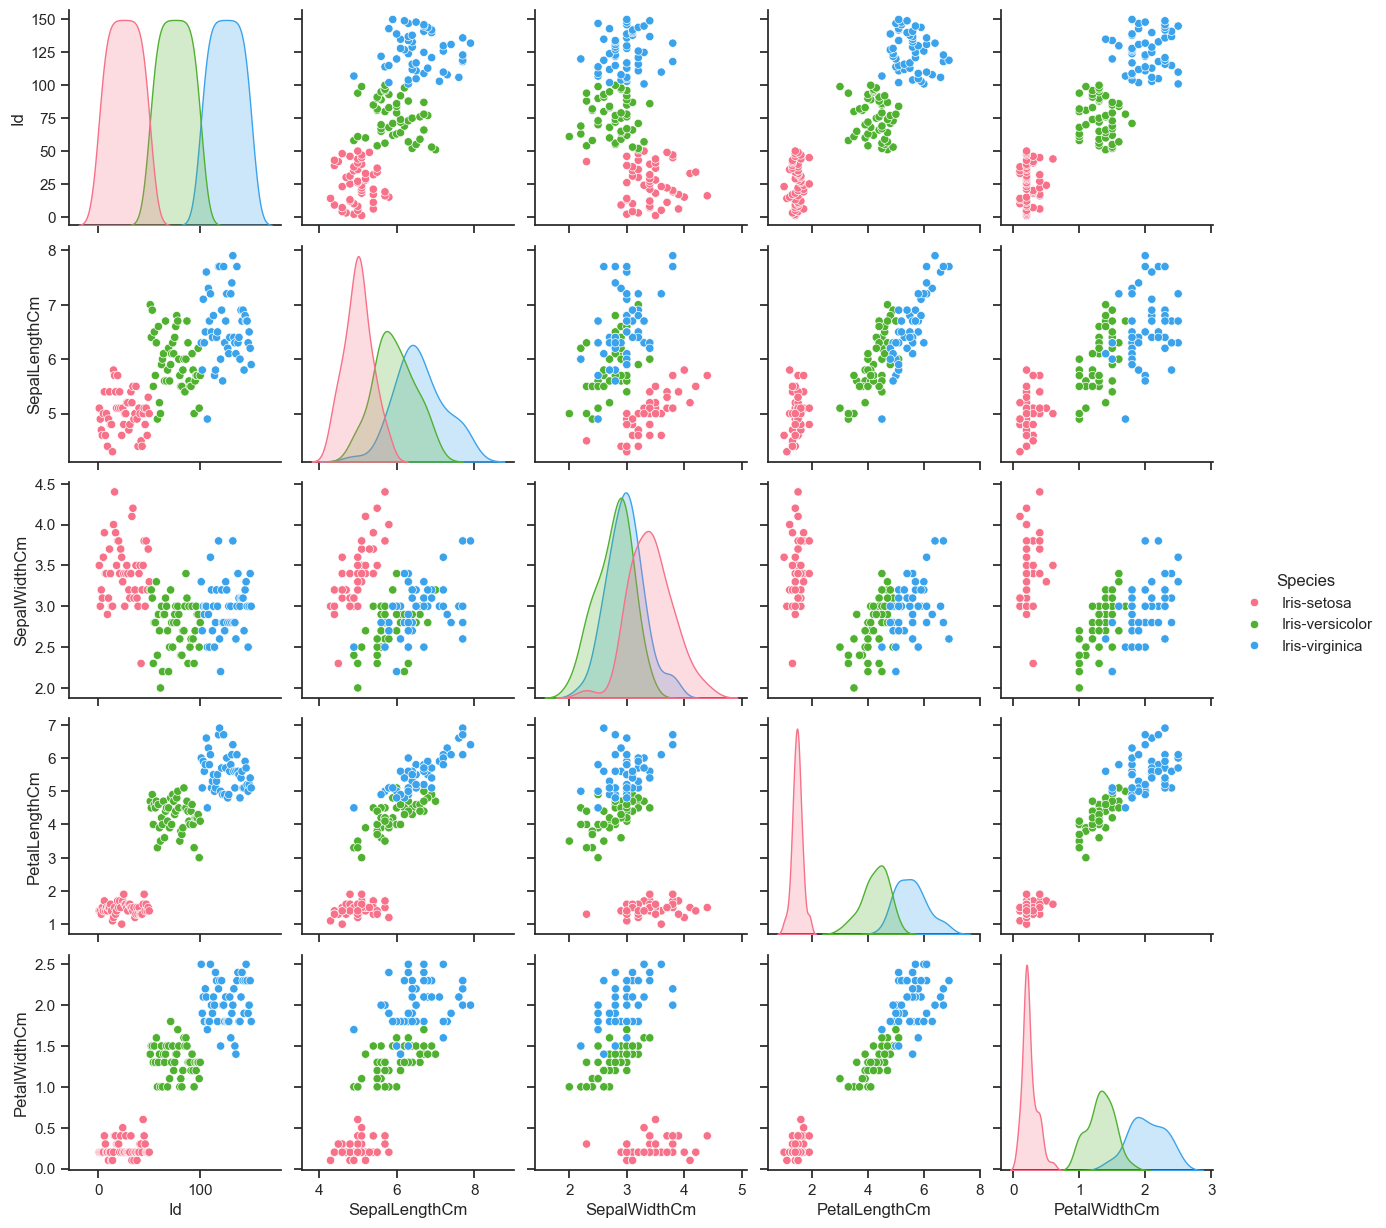

In [46]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, hue="Species", palette="husl")

C:\Users\박랑희\AppData\Local\Temp\ipykernel_32944\2844164756.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Species', y='SepalWidthCm', data=data, ci=None)


<Axes: xlabel='Species', ylabel='SepalWidthCm'>

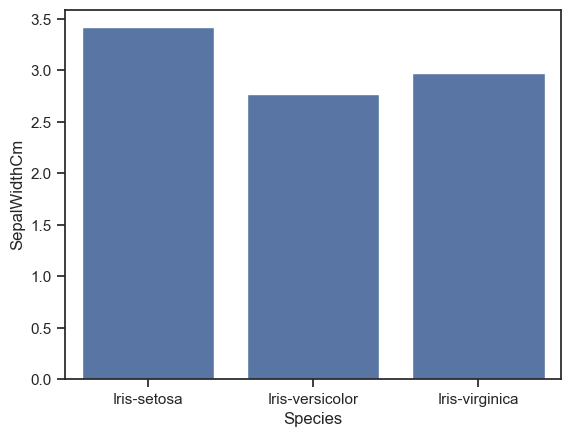

In [47]:
# 각 종과 특성에 대한 연관 관계
sns.barplot(x='Species', y='SepalWidthCm', data=data, ci=None)

<Axes: xlabel='Species'>

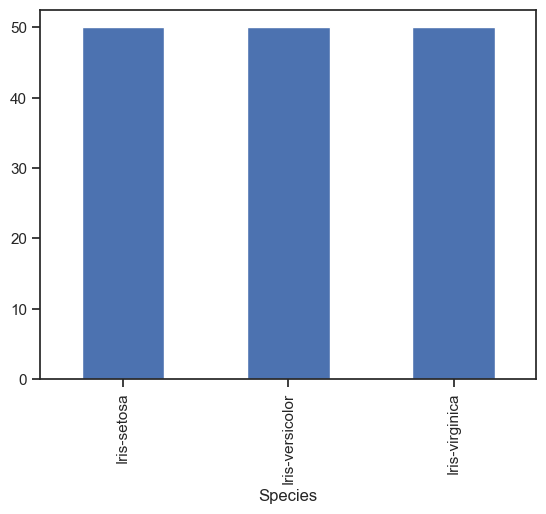

In [48]:
data['Species'].value_counts().plot(kind='bar')

<Axes: xlabel='Species'>

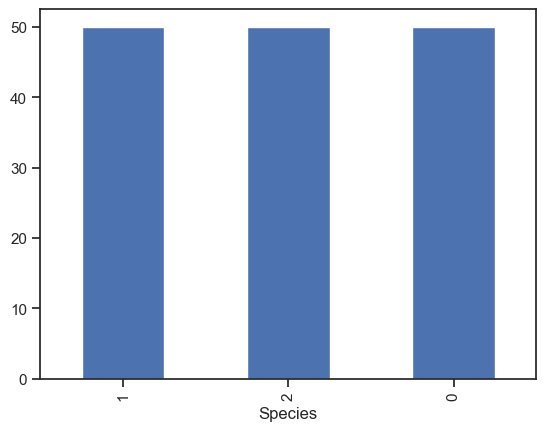

In [50]:
# Iris-virginica는 0, Iris-setosa는 1, Iris-versicolor는 2가 됨.
data['Species'] = data['Species'].replace(['Iris-virginica','Iris-setosa','Iris-versicolor'],[0,1,2])
data['Species'].value_counts().plot(kind='bar')

In [51]:
# X 데이터. 특성은 총 4개.
data_X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

# Y 데이터. 예측 대상.
data_y = data['Species'].values

print(data_X[:5])
print(data_y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[1 1 1 1 1]


In [52]:
# 훈련 데이터와 테스트 데이터를 8:2로 나눈다.
(X_train, X_test, y_train, y_test) = train_test_split(data_X, data_y, train_size=0.8, random_state=1)

# 원-핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:5])
print(y_test[:5])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200, batch_size=1, validation_data=(X_test, y_test))

Epoch 1/200
120/120 [==============================] - 1s 2ms/step - loss: 2.6080 - accuracy: 0.0750 - val_loss: 2.0743 - val_accuracy: 0.0000e+00
Epoch 2/200
120/120 [==============================] - 0s 1ms/step - loss: 1.8910 - accuracy: 0.0000e+00 - val_loss: 1.6638 - val_accuracy: 0.0000e+00
Epoch 3/200
120/120 [==============================] - 0s 1ms/step - loss: 1.6037 - accuracy: 0.0083 - val_loss: 1.5277 - val_accuracy: 0.0667
Epoch 4/200
120/120 [==============================] - 0s 1ms/step - loss: 1.5007 - accuracy: 0.0917 - val_loss: 1.4852 - val_accuracy: 0.1333
Epoch 5/200
120/120 [==============================] - 0s 976us/step - loss: 1.4318 - accuracy: 0.1167 - val_loss: 1.4130 - val_accuracy: 0.1667
Epoch 6/200
120/120 [==============================] - 0s 1ms/step - loss: 1.3643 - accuracy: 0.1750 - val_loss: 1.3509 - val_accuracy: 0.2000
Epoch 7/200
120/120 [==============================] - 0s 1ms/step - loss: 1.3012 - accuracy: 0.1417 - val_loss: 1.2965 - val_ac

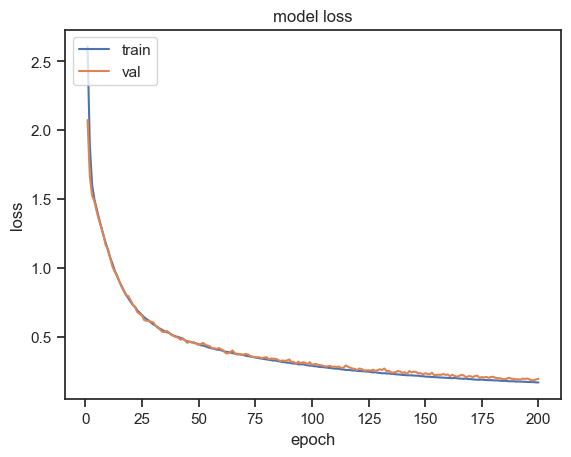

In [54]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [55]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

1/1 [==============================] - 0s 98ms/step - loss: 0.1965 - accuracy: 0.9667

 테스트 정확도: 0.9667
